# TEMA6. ANÁLISIS DE REGRESIÓN LINEAL Y RAMSAC

In [1]:
#Instalando las librerías necesarias

import os   #Cambiar directorio de trabajo

#Manipulación de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesado y modelado
from scipy import stats    #Contiene a la función de pearsonr
from scipy import special  #Contiene la función softmax
from sklearn.model_selection import train_test_split #Particionamiento de datos
from sklearn.linear_model import LinearRegression #Para Análisis de Regresión Lineal
from sklearn.linear_model import RANSACRegressor #Para Análisis de Regresión RANSAC
from sklearn.metrics import r2_score #Calcula el coeficiente de determinación r2
from sklearn.metrics import mean_squared_error #Calcula el error cuadratico medio
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import math as m

#Just In Case
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Estableciendo directorio
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

## _Caso dataset Housing_

In [3]:
miarchivo="housing.data.txt"
df=pd.read_csv(miarchivo, sep='\s+',header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#Dimensiones del DF
df.shape

(506, 14)

In [5]:
#Generamos un listado de variables con las que trabajaremos
columnas=['LSTAT','INDUS','NOX','RM','MEDV']

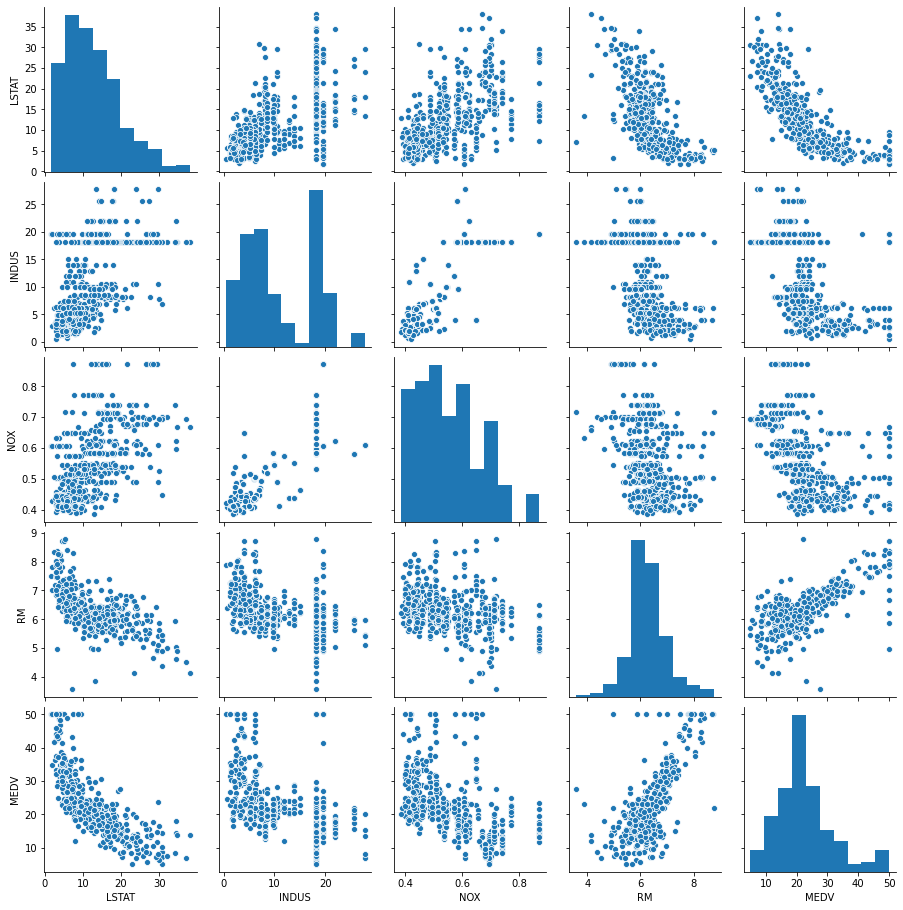

In [6]:
sns.pairplot(df.loc[:,columnas])
plt.show()

### _Matriz de Correlación_

In [8]:
cormat=np.corrcoef(df[columnas].values.T)
cormat

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

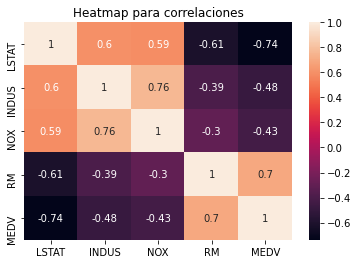

In [9]:
#La misma matriz de correlación puede ser presentada mediante un HeatMap
hm=sns.heatmap(data=cormat,
               annot=True, #Muestra los valores de las correlaciones en las celdas
               cbar=True, #barra de color a modo de saturación
               xticklabels=columnas,
               yticklabels=columnas)
plt.title('Heatmap para correlaciones')
plt.show()

In [11]:
#Correlación lineal entre dos variables
cor_test=stats.pearsonr(df['RM'],df['MEDV'])
print(cor_test)
print('El p-value es:', cor_test[1])

(0.6953599470715393, 2.487228871007442e-74)
El p-value es: 2.487228871007442e-74


## _Modelo de Regresión Lineal Simple_

In [12]:
df[columnas].head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [13]:
#Establecer nuestra matriz de datos X y variable target Y
X=df[['RM']].values
y=df[['MEDV']].values

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3,
                                               random_state=2020)

In [47]:
#Creando una instancia LinearRegression()
modelorls=LinearRegression()

In [48]:
#Hacemos que el modelo aprenda de los datos
modelorls.fit(X_train,y_train)

LinearRegression()

In [49]:
#Información del Modelo
#=====================================
print("El interceptor del modelo es :",modelorls.intercept_.round(3))
print("La pendiente del modelo es:",modelorls.coef_[0].round(3))
print("El coeficiente de determinacion R2 es:", (modelorls.score(X_train,y_train)*100).round(2), "%")

El interceptor del modelo es : [-36.031]
La pendiente del modelo es: [9.389]
El coeficiente de determinacion R2 es: 53.35 %


In [50]:
#Estimacion de la variable Dependiente o YPredicho
ytrain_pred=modelorls.predict(X_train)
ytest_pred=modelorls.predict(X_test)

In [51]:
#Otra forma de calcular el R2 mediante sklearn
print("El coeficiente de determinacion R2 es:", (r2_score(y_train,ytrain_pred)*100).round(2), "%")

El coeficiente de determinacion R2 es: 53.35 %


#### _Evaluacion de Modelos (MSE)_

In [52]:
#Error cuadrático Medio para data de entrenamiento
print("MSE para Dataset Training",mean_squared_error(y_train,ytrain_pred).round(2))

MSE para Dataset Training 40.46


In [53]:
#Error cuadrático Medio para data de testing
print("MSE para Dataset Testing",mean_squared_error(y_test,ytest_pred).round(2))

MSE para Dataset Testing 51.7


#### _Evaluacion de Modelos (RMSE)_

In [54]:
#para data de entrenamiento
round(m.sqrt(mean_squared_error(y_train,ytrain_pred)),3)

6.361

In [55]:
#para data de testing
round(m.sqrt(mean_squared_error(y_test,ytest_pred)),3)

7.19

#### _Evaluacion de Modelos (R2)_

In [56]:
#para data de entrenamiento
round(r2_score(y_train,ytrain_pred),3)

0.533

In [57]:
#para data de testing
round(r2_score(y_test,ytest_pred),3)

0.337

In [58]:
#Creando una función para visualizar los datos y la recta de regresión
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return

### _Graficando mis datos de entrenamiento_

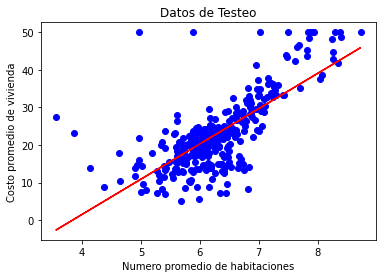

In [59]:
lin_regplot(X_train,y_train,modelorls)
plt.title('Datos de Testeo')
plt.xlabel('Numero promedio de habitaciones')
plt.ylabel('Costo promedio de vivienda')
plt.show()

#### _Graficando mis datos de testeo_

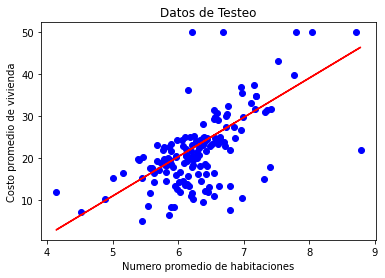

In [60]:
lin_regplot(X_test,y_test,modelorls)
plt.title('Datos de Testeo')
plt.xlabel('Numero promedio de habitaciones')
plt.ylabel('Costo promedio de vivienda')
plt.show()

In [61]:
X_train=sm.add_constant(X_train,prepend=True)
modelo=sm.OLS(endog=y_train,exog=X_train)
modelo=modelo.fit()

In [62]:
#Visualizando el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           3.07e-60
Time:                        11:00:16   Log-Likelihood:                -1157.3
No. Observations:                 354   AIC:                             2319.
Df Residuals:                     352   BIC:                             2326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0308      2.957    -12.184      0.0

In [63]:
modelo.conf_int()

array([[-41.84689134, -30.21475493],
       [  8.46846855,  10.30926187]])

## _Modelo de Regresión Lineal Múltiple_

### Caso Determinantes del Ausentismo electoral

In [64]:
miarchivo="AusentismoPres2011.sav"
df=pd.read_spss(miarchivo)
df.head()

,Ubigeo,Departamento,Dom_Geo,Provincia,Distrito,NumeroDePersonasTotalElectoral,NumeroDePersonasAusentismo,PorcentajeDeAusentismoRespectoAlTotalElectoral,PorcentajeDeAusentismoOrdinal,PorcentajeDeAusentismoDicotomica,PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion,IDH,Alfabetismo,PartidoGanador,PorcentajeDeHogaresEnViviendasCon2oMasNBI,GINI
0,010102,Amazonas,Norte,Chachapoyas,Asunción,234.0,59.0,25.213675,Ausentismo Grave,Ausentismo Fuerte,100.00,0.581463,86.893200,PERU POSIBLE,51.11,0.30
1,010103,Amazonas,Norte,Chachapoyas,Balsas,848.0,208.0,24.528301,Ausentismo Grave,Ausentismo Fuerte,94.87,0.562141,86.527290,FUERZA 2011,20.23,0.31
2,010104,Amazonas,Norte,Chachapoyas,Cheto,478.0,51.0,10.669457,Ausentismo Bajo,Ausentismo Leve,99.40,0.599150,92.838196,GANA PERU,16.87,0.28
3,010105,Amazonas,Norte,Chachapoyas,Chiliquín,638.0,197.0,30.877743,Ausentismo Grave,Ausentismo Fuerte,99.60,0.545484,86.541740,FUERZA 2011,31.73,0.29
4,010106,Amazonas,Norte,Chachapoyas,Chuquibamba,1161.0,333.0,28.682170,Ausentismo Grave,Ausentismo Fuerte,99.62,0.584659,92.598430,FUERZA 2011,17.55,0.31


In [66]:
df.columns

Index(['Ubigeo', 'Departamento', 'Dom_Geo', 'Provincia', 'Distrito',
       'NumeroDePersonasTotalElectoral', 'NumeroDePersonasAusentismo',
       'PorcentajeDeAusentismoRespectoAlTotalElectoral',
       'PorcentajeDeAusentismoOrdinal', 'PorcentajeDeAusentismoDicotomica',
       'PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion', 'IDH',
       'Alfabetismo', 'PartidoGanador',
       'PorcentajeDeHogaresEnViviendasCon2oMasNBI', 'GINI'],
      dtype='object')

In [72]:
ausent=df[['PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion','IDH','Alfabetismo','PorcentajeDeHogaresEnViviendasCon2oMasNBI','PorcentajeDeAusentismoRespectoAlTotalElectoral']]

In [73]:
len(ausent)

1833

In [74]:
#Conteo de NAs
ausent.isnull().sum()

PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion    1
IDH                                                       0
Alfabetismo                                               0
PorcentajeDeHogaresEnViviendasCon2oMasNBI                 1
PorcentajeDeAusentismoRespectoAlTotalElectoral            0
dtype: int64

In [75]:
ausent=ausent.dropna(axis=0)
len(ausent)

1832

In [76]:
ausent.head()

,PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion,IDH,Alfabetismo,PorcentajeDeHogaresEnViviendasCon2oMasNBI,PorcentajeDeAusentismoRespectoAlTotalElectoral
0,100.00,0.581463,86.893200,51.11,25.213675
1,94.87,0.562141,86.527290,20.23,24.528301
2,99.40,0.599150,92.838196,16.87,10.669457
3,99.60,0.545484,86.541740,31.73,30.877743
4,99.62,0.584659,92.598430,17.55,28.682170


In [77]:
#Estableciendo nuestra matriz de datos X y nuestra variable target y
X=ausent.iloc[:,0:4].values
y=ausent.iloc[:,4].values

In [78]:
#Particionamiento de datos
X_Train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2020)

In [80]:
#Instnanciar un objeto de clase LinearRegression()
modelorlm=LinearRegression()
#Hacer que nuestro modelo aprenda de los datos
modelorlm.fit(X_Train,y_train)

LinearRegression()

In [81]:
#Estimar los valores de Ypredicho
y_train_pred=modelorlm.predict(X_Train)
y_test_pred=modelorlm.predict(X_test)

In [83]:
#Evaluando el coeficiente de determinacon R2
print("Coeficiente de Determinacion-Training",r2_score(y_train,y_train_pred).round(2))
print("Coeficiente de Determinacion-Testing",r2_score(y_test,y_test_pred).round(2))

Coeficiente de Determinacion-Training 0.28
Coeficiente de Determinacion-Testing 0.24


In [84]:
#Evaluando el MSE
print("MSE-Training",mean_squared_error(y_train,y_train_pred).round(2))
print("MSE-Testing",mean_squared_error(y_test,y_test_pred).round(2))

MSE-Training 46.07
MSE-Testing 53.15


## _Modelo Robusto con RANSAC:_

In [86]:
miarchivo="housing.data.txt"
df=pd.read_csv(miarchivo, sep='\s+',header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [87]:
#Establecer nuestra matriz de datos X y variable target Y
X=df[['RM']].values
y=df[['MEDV']].values

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=2020)

In [90]:
#Instanciar un objeto de clase RANSACRegressor
ransac=RANSACRegressor(base_estimator=LinearRegression(),
                      min_samples=50, #numero minimo de registros para el arranque en inliers
                      residual_threshold=5,
                      random_state=0)

In [91]:
#Aprendiendo de los datoa de entrenamiento
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5)

In [92]:
ransac.inlier_mask_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True, False,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

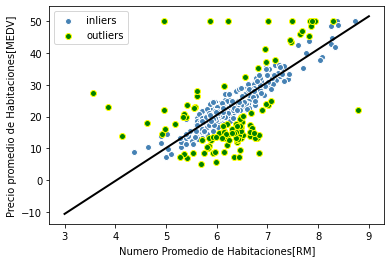

In [93]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

line_X=np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
plt.scatter(X_train[inlier_mask],y_train[inlier_mask],c='steelblue',edgecolors='white',marker='o',label='inliers')
plt.scatter(X_train[outlier_mask],y_train[outlier_mask],c='green',edgecolors='yellow',marker='o',label='outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)
plt.xlabel('Numero Promedio de Habitaciones[RM]')
plt.ylabel('Precio promedio de Habitaciones[MEDV]')
plt.legend(loc='upper left')
plt.show()

In [94]:
#Calculando los Ypredichos
y_train_pred_ransac=ransac.predict(X_train)

In [95]:
r2_score(y_train,y_train_pred_ransac)

0.48824960318960087

## Tema7. Análisis de Regresión Logistica